In [24]:
import os
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing, metrics

# Parameters
do_grid_search_cv = True
do_pca = False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

train = read_data('C:/Users/Mirela/PycharmProjects/Human activity/human-activity-recognition-with-smartphones', 'train.csv')
print(train.head())
print(train.dtypes)

print(train.isna().sum())
train = train.dropna()
print(train.head())

test = read_data('C:/Users/Mirela/PycharmProjects/Human activity/human-activity-recognition-with-smartphones', 'test.csv')
print(test.head())

print(test.isna().sum())
test = test.dropna()
print(test.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

Preparing the data

Vectorized training data &  test data
Vectorizing text is the process of transforming text into numeric tensors.


In [25]:
# Encode the categorical features as numbers
result = train.copy()
encoders = {}
for column in result.columns:

    if result.dtypes[column] == pd.np.object:
        encoders[column] = preprocessing.LabelEncoder()
        result[column] = encoders[column].fit_transform(result[column])

train = result
train_names = train.columns.get_values()
print(train.head())

result = test.copy()
encoders = {}
for column in result.columns:

    if result.dtypes[column] == pd.np.object:
        encoders[column] = preprocessing.LabelEncoder()
        result[column] = encoders[column].fit_transform(result[column])
test = result
test_names = test.columns.get_values()
print(test.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [26]:
train_labels = np.array(train['Activity']) # Create an array.

# Remove the labels from the features
# axis 1 refers to the columns

train_features = train.drop('Activity', axis=1) #  Remove columns by specifying label names and coresponding axis

In [27]:
test_labels = np.array(test['Activity']) # Create an array.

# Remove the labels from the features
# axis 1 refers to the columns

test_features = test.drop('Activity', axis=1) #  Remove columns by specifying label names and coresponding axis

In [28]:
num_classes = np.max(train_labels) + 1
print(num_classes, 'classes')

6 classes


In [29]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7352, 562)
Training Labels Shape: (7352,)
Testing Features Shape: (2947, 562)
Testing Labels Shape: (2947,)


Building my network

In [30]:
input_dimensions = train_features.shape[1]
optimizer = 'rmsprop'
dropout = 0.05
model = Sequential()
inner_nodes = int(input_dimensions / 2)

model.add(Dense(inner_nodes, kernel_initializer='uniform', activation='relu', input_dim=input_dimensions))
model.add(Dropout(rate=dropout))
model.add(Dense(inner_nodes, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=dropout))
model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))

I ended the network with a Dense layer of size 6. This means for each input sample, the network will output a 6-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
The last layer uses a softmax activation.It means the network will output a probability
distribution over the 6 different output classes—for every input sample,
the network will produce a 6-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 6 scores will sum to 1.

In [31]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])

The best loss function to use in this case is categorical_crossentropy.
Loos function measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, you train the
network to output something as close as possible to the true labels.

Validating the approach
Training the model

In [32]:
EPOCHS = 20

history = model.fit(
  train_features, train_labels,
  epochs=EPOCHS, batch_size=512, validation_split = 0.2, verbose=0)#Trains the model for a given number of epochs (iterations on a dataset)

In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

    val_loss  val_accuracy      loss  accuracy  epoch
15  0.162461      0.935418  0.253721  0.901037     15
16  0.229647      0.910945  0.167450  0.930454     16
17  0.350724      0.854521  0.155462  0.931984     17
18  0.199955      0.920462  0.264853  0.902057     18
19  0.339181      0.855880  0.154887  0.931984     19


Let’s display its loss and accuracy curves
Training and validation loss & training and validation accuracy


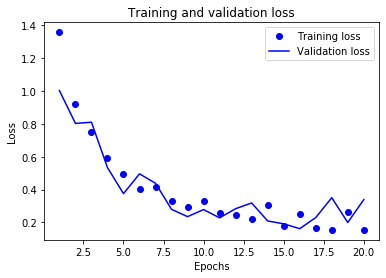

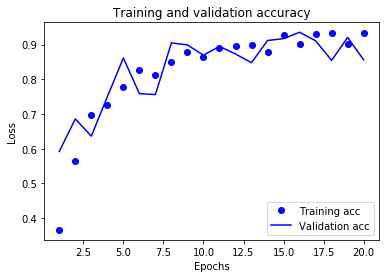

In [34]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting the training and validation accuracy

plt.clf() 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
results = model.evaluate(test_features, test_labels)
print(results)

2947/2947 [==============================] - 0s 35us/step
[0.3768768828721862, 0.8384798169136047]


Generating predictions for new data

In [36]:
predictions = model.predict(test_features)

In [37]:
predictions[0].shape

(6,)

Each entry in predictions is a vector of length 6:

In [38]:
np.sum(predictions[0])

1.0

The coefficients in this vector sum to 1:

In [39]:
np.argmax(predictions[0])

2

The largest entry is the predicted class—the class with the highest probability

Conclusions:
    
Because I have many classes, this problem is an
instance of multiclass classification; and because each data point should be
classified into only one category, the problem is more specifically an instance of
single-label, multiclass classification.

Similarly, evaluation metrics to be used for regression differ from those
used for classification; naturally, the concept of accuracy doesn’t apply for
regression.

I usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Stacks of Dense layers with relu activations can solve a wide range of problems. In a multiclass classification problem (many output classes).The rmsprop optimizer is generally a good enough choice, whatever the problem. As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’venever seen before. Be sure to always monitor performance on data that is outside of the training set.
